# Program Curriculum Design

In [209]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from time import sleep

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Clustering of skills

Use hierachircal clustering to cluster the skills identified above. Each cluster could potentially represent closely related skills according to the dataset. Thus, the clusters can be used as topic (or give an idea of  topic) that can be added on the curriculum and elements of the cluster can inform the subtopics. (or something along these lines)

### Kaggle data

In [210]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [211]:
kaggle_skills = pd.read_csv('kaggle_skills_2018[1].csv') 
kaggle_skills = kaggle_skills.drop(['Unnamed: 0'], axis=1)

In [212]:
kaggle_skills.shape

(23859, 189)

In [213]:
df=kaggle_skills.T
cos_similarity_matrix=df.dot(df.T)

Text(0.5, 1.0, 'Hierarchical clustering of Kaggle skills ')

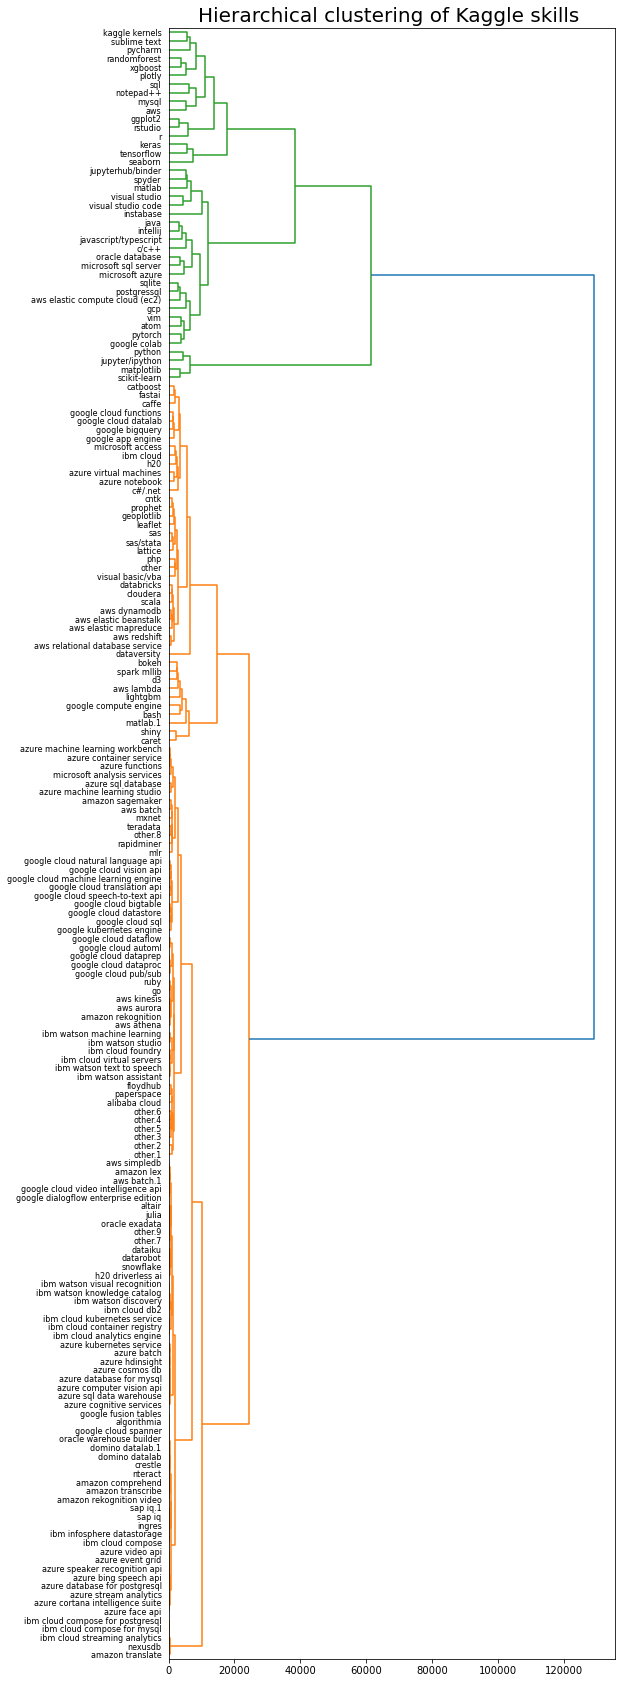

In [214]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

Z = linkage(cos_similarity_matrix, method='ward', metric='euclidean')
fig = plt.figure(figsize=(8, 30))

# First define the leaf label function.
n=kaggle_skills.shape[1]
labels=cos_similarity_matrix.columns.values.tolist()
def llf(id):
    if id < n:
        return labels[id]

# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
dendrogram(Z, orientation='right', leaf_label_func=llf,leaf_font_size=8)

plt.title("Hierarchical clustering of Kaggle skills ",fontsize=20)

## Indeed

In [190]:
job_info_df = pd.read_csv('indeed_jobs[1].csv')
job_info_df = job_info_df.drop(['Unnamed: 0'], axis=1)
# Drop rows without description
job_info_df.replace("", np.nan, inplace=True)
job_info_df.dropna(subset = ['description'], inplace=True)
job_info_df.reset_index(drop=True, inplace=True)
job_info_df.head()


,employer,link,location,position_title,salary,description
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...


In [110]:
'''skills=kaggle_skills.columns.values.tolist()
#remove_list=['other','d','h','d']
#skills=[x for x in a if x not in remove_list]
skills=[sub_item for item in kaggle_skills for sub_item in item.split("/")]
pattern = '[0-9]'
skills=[re.sub(pattern, '', i) for i in skills] 
#[x for x in skills x.replace('.', '')]
#np.apply(lambda x: x.replace('.', ''))
skills=[x.replace('.', '') for x in skills] #remove dot
skills=list(set(skills)) #keep unique values
remove_list=['other','d','h','d','go']
skills_kaggle=[x for x in skills if x not in remove_list]'''

In [191]:
# List possible skill requirements
skills=['excel','communication','teamwork','critical thinking','presentation', 'marketing','leadership', 'time management', 'collaborate', 'organize',
         'problem-solving', 'project management', 'consulting','negotiation', 'creativity','statisitcal','product management',
        'A.I.','software development','data mining','databases','modeling','spss','spark','optimization','tableau', 'datorama','hadoop', 'spark','power bi','tensorflow', 'sklearns', 'keras','pytorch','theano','data cleaning','Openshift',
       'neural network','deep learning','artificial intelligence','python','r', 'java', 'c', 'c++', 'matlab', 'sas','sql','nosql','linux','big data','data wrangling', 'critical thinking', 'data extraction','feature engineering',
        'powercenter','Informatica','azure','RapidMiner','H2O.ai','DataRobot','api','etl']
skills=[x.lower() for x in skills]
skills = np.array(skills)

#initialize the skills column
for skill in skills:
    job_info_df[skill] = np.zeros(job_info_df.shape[0])
job_info_df


,employer,link,location,position_title,salary,description,excel,communication,teamwork,critical thinking,...,data extraction,feature engineering,powercenter,informatica,azure,rapidminer,h2o.ai,datarobot,api,etl
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,The Mason Group,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Financial Analyst,"$70,000 - $80,000 a year",do you have an interest in working for a globa...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1265,International Financial Group,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Cyber Fraud Risk Analyst,NaN,position title: cyber fraud risk analyst\nposi...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1266,Loblaw Digital,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Senior marketing analyst, sdm ecommerce, Toronto",NaN,please apply on isarta\n\ncompany :\n\nloblaw ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1267,Robert Half,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Sr. Financial Analyst,"$80,000 - $90,000 a year",robert half finance & accounting is currently ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [194]:
# Helper function for extracting the skills from job description
def extract_skills():
    for i in range(len(job_info_df)):
        for s in skills :
            # This is specifically for C++, escape the ++. Convert C++ to C\+\+
            if any(x in s for x in ['+']):
                skill = re.escape(s)
            else:
                skill = s
            description = job_info_df.loc[i, 'description']
            matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',description)
            
            if matching:
                job_info_df[s][i] = 1
                #print("matched skill ",s, "for job ",str(i+1))

In [195]:
extract_skills()

,employer,link,location,position_title,salary,description,excel,communication,teamwork,critical thinking,...,data extraction,feature engineering,powercenter,informatica,azure,rapidminer,h2o.ai,datarobot,api,etl
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
indeed_skills = job_info_df.drop(['employer', 'link', 'location', 'position_title', 'salary', 'description'], axis=1)
indeed_skills.head()

,excel,communication,teamwork,critical thinking,presentation,marketing,leadership,time management,collaborate,organize,...,data extraction,feature engineering,powercenter,informatica,azure,rapidminer,h2o.ai,datarobot,api,etl
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


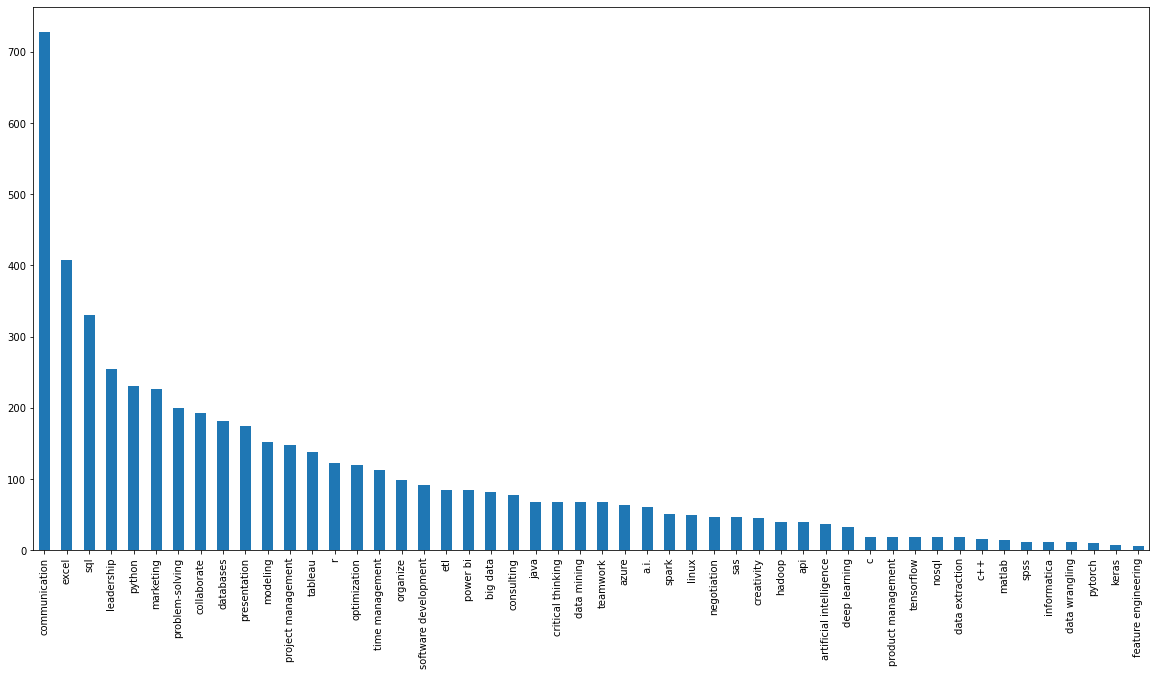

In [197]:
# Visualize the frequency of the skills in indeed job postings
plt.figure(figsize=(20,10))
ax = indeed_skills.sum().sort_values(ascending=False)[:50].plot(kind="bar")
plt.show()

In [202]:
#Remove skills that are not found in indeed job postings
indeed_df = indeed_skills.drop(columns=indeed_skills.columns[indeed_skills.sum()==0])
indeed_df.head()

,excel,communication,teamwork,critical thinking,presentation,marketing,leadership,time management,collaborate,organize,...,nosql,linux,big data,data wrangling,data extraction,feature engineering,informatica,azure,api,etl
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
from sklearn.metrics import pairwise
cos_similarity_matrix=pairwise.cosine_similarity(indeed_df.T)
cos_similarity=pd.DataFrame(cos_similarity_matrix,columns=indeed_df.columns, index=indeed_df.columns)
distance_between_skills=cos_similarity.apply(lambda col: (1-col))


Text(0.5, 1.0, 'Hierarchical clustering of Indeed skills ')

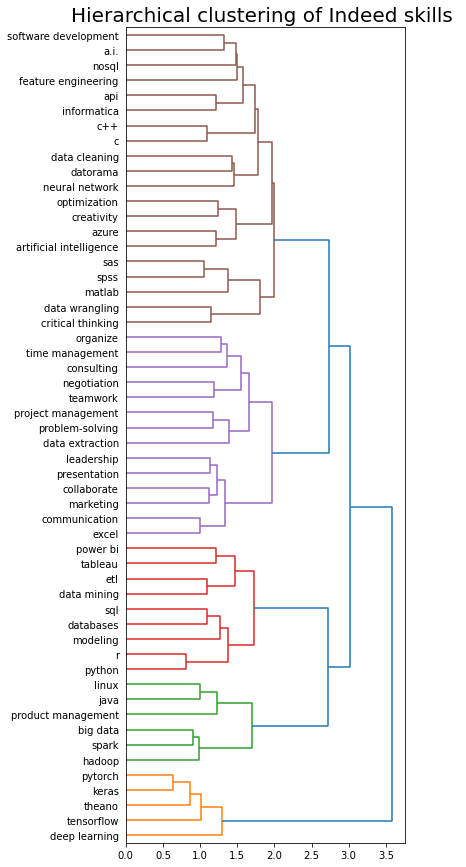

In [337]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances

# Method 'ward' requires the distance metric to be Euclidean
Z = linkage(distance_between_skills, method='ward', metric='euclidean')
fig = plt.figure(figsize=(5, 15))

# First define the leaf label function.
n=distance_between_skills.shape[0]
labels=distance_between_skills.columns.values.tolist()
def llf(id):
    if id < n:
        return labels[id]
    else:
        return '[%d]' % (id)
    
# The text for the leaf nodes is going to be big so force
# a rotation of 90 degrees.
dendrogram(Z, orientation='right', leaf_label_func=llf,leaf_font_size=10)

plt.title("Hierarchical clustering of Indeed skills ",fontsize=20)

## k-means clustering

In [224]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Determine number of cluster. Too little and we could be grouping data together that have significant differences. Too many clusters and we will just be overfitting the data and our results will not generalise well. To answer this question we will use the elbow method which is a common technique used for this task. It involves estimating the model using various numbers of clusters and calculating the negative of the within-cluster sum of squares for each number of clusters chosen using the score method from sklearn. We choose the number where adding further clusters only marginally increases the score. In this case, we decide to use 5

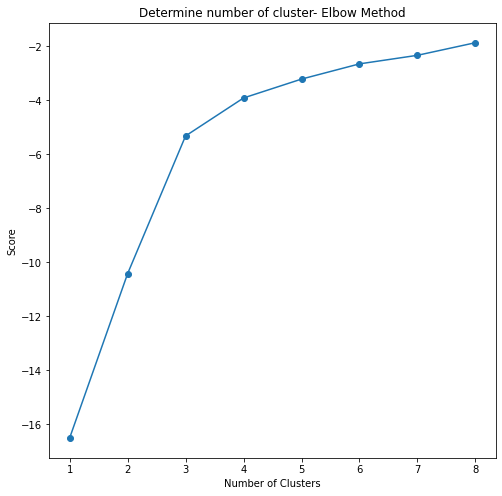

In [338]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(distance_between_skills)

number_clusters = range(1, 9)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Determine number of cluster- Elbow Method')
plt.show()

In [339]:
#PCA reduce dimensionality to visualize clustering
# k-means clustering
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(distance_between_skills)

kmeans = KMeans(n_clusters=5,  algorithm = 'auto')
kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [314]:
Y_sklearn

,PC1,PC2
excel,-0.672560,-0.113762
communication,-0.862556,0.304505
teamwork,-0.236028,-0.394930
critical thinking,-0.107466,-0.179410
presentation,-0.436707,0.017314
marketing,-0.431630,0.231994
leadership,-0.375638,0.086554
time management,-0.258425,-0.432598
collaborate,-0.381300,0.161801
organize,-0.169930,-0.342264


Text(0, 0.5, 'pc2')

<Figure size 360x360 with 0 Axes>

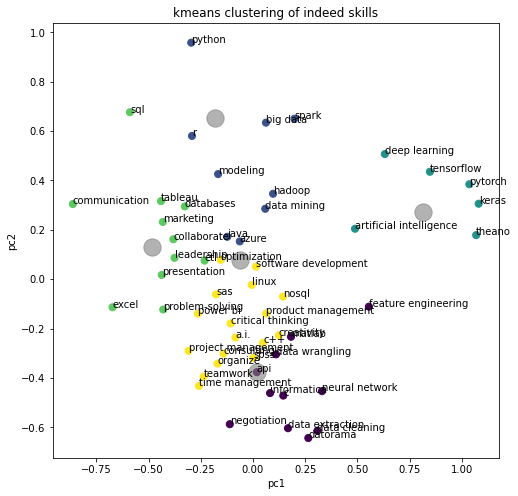

In [335]:
plt.figure(figsize=(5,5))
#plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
x=Y_sklearn[:, 0]
y=Y_sklearn[:, 1]
label = distance_between_skills.index.values

fig, ax = plt.subplots()
ax.scatter(x, y, c=prediction, s=50, cmap='viridis')

plt.rcParams["figure.figsize"] = [8,8]
for i, txt in enumerate(label):
    ax.annotate(txt, (x[i], y[i]))
        
centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='grey', s=300, alpha=0.6);
plt.title("kmeans clustering of indeed skills")
plt.xlabel("pc1")
plt.ylabel("pc2")

# PCA 

In [244]:
import  pandas as pd 
import  numpy as np
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

## Import data, check shape, table and basic stats

In [245]:
indeed_skills

,excel,communication,teamwork,critical thinking,presentation,marketing,leadership,time management,collaborate,organize,...,data extraction,feature engineering,powercenter,informatica,azure,rapidminer,h2o.ai,datarobot,api,etl
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1265,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1266,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1267,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [247]:
#Standardize data
scaled = StandardScaler().fit_transform(indeed_skills)

##### Perform PCA

In [250]:
pca = PCA(n_components=3, svd_solver='full')

In [251]:
PC_scores = pca.fit_transform(scaled)

Extract the scores (1296 job posting (rows), 2 scores (columns))

In [253]:
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3'])

In [254]:
scores_pd

,PC1,PC2,PC3
0,-1.676329,1.155205,0.694676
1,6.025748,-5.195273,10.119855
2,-0.968903,0.427692,0.362807
3,-1.032450,0.521395,0.863298
4,-1.203176,0.902230,0.405145
...,...,...,...
1264,-0.167060,-0.870812,-1.410856
1265,3.757479,-2.308775,0.543477
1266,2.443237,-3.751268,-4.293080
1267,-0.710922,0.525267,1.158982


##### Extract the loadings (new dimension directions, compared to the old 28) 

In [255]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = indeed_skills.columns)

In [256]:
loadings_pd

,PC1,PC2,PC3
excel,-0.113267,0.001543,-0.088274
communication,-0.052645,0.056808,0.028188
teamwork,-0.025894,-0.001704,0.032288
critical thinking,0.047399,-0.041833,-0.148780
presentation,0.033960,-0.060282,0.213159
...,...,...,...
rapidminer,0.000000,-0.000000,-0.000000
h2o.ai,0.000000,-0.000000,-0.000000
datarobot,0.000000,-0.000000,-0.000000
api,0.027432,-0.060027,-0.012954


##### Plot the scores and loadings

In [280]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    plt.scatter(xt * scalext,yt * scaleyt, s=10,color='k')

    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.title("PCA",fontsize=20)
    plt.tick_params(labelsize=16)
    plt.grid()

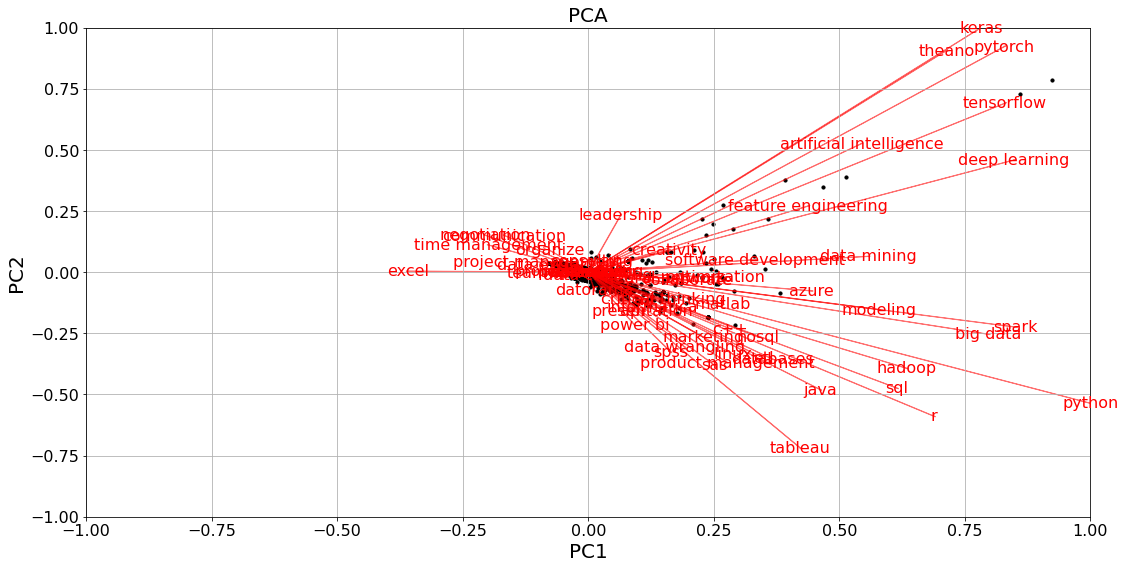

In [281]:
plt.rcParams["figure.figsize"] = [18,9]
myplot(PC_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()